torch:


*   it's a package that has the data structures for multi-dim tensors and defines mathematical operations on them
*   also defines other utilities



In [ ]:
#Learning resource used: https://www.learnpytorch.io/ (Module 00 and 01)
import torch

#creates a tensor with random values
random_image_tensor = torch.rand([224,224,3]) * 100

print(random_image_tensor)
print(f"Shape: {random_image_tensor.shape}")
print(f"Dimensions: {random_image_tensor.ndim}")
print(f"Data type: {random_image_tensor.dtype}")
print(f"Tensor on device: {random_image_tensor.device}")

tensor([[[5.1813e+01, 4.0214e+01, 6.2047e+01],
         [3.5476e+01, 5.0561e+01, 9.7342e+01],
         [5.9717e+00, 7.1154e+01, 9.5265e+01],
         ...,
         [5.2110e+01, 1.6286e+01, 9.6945e+01],
         [7.8490e+01, 7.5615e+01, 9.6641e+01],
         [5.2080e+01, 6.8970e+01, 6.2350e+01]],

        [[9.5761e+01, 9.9942e+01, 8.5771e-02],
         [2.3443e+01, 8.2598e+01, 5.8053e+01],
         [3.5682e+01, 3.6429e+01, 3.7289e+01],
         ...,
         [7.7997e+01, 4.2276e+01, 9.9568e+01],
         [4.4466e+01, 3.3196e+01, 2.0405e+01],
         [8.0209e+01, 2.1816e+01, 3.6319e+01]],

        [[8.8607e+01, 5.5582e+01, 1.5091e+01],
         [2.1839e+01, 9.4757e+01, 7.8997e+01],
         [7.6348e+00, 7.4913e+01, 2.8631e+01],
         ...,
         [3.7637e+01, 1.1958e+01, 8.5431e+01],
         [1.2345e+01, 6.4824e+01, 5.7851e+00],
         [7.3873e+01, 2.9656e+01, 8.0394e+01]],

        ...,

        [[9.7555e+01, 5.5524e+01, 9.5575e+01],
         [5.8725e+01, 8.6880e+01, 2.1262e+01]

In [ ]:
#converts the list to tensor
tensor = torch.tensor([10, 12, 22, 45])

print("adding scalar: ", tensor+10)

#unless re-assigned, the tensor won't change
print(tensor)

#scalar multiplication
print("scalar multiplication: ",100*tensor)

print("element-wise multiplication: ", tensor*tensor)

#changing data type of tensor
tensor_float32 = tensor.type(torch.float32)

print("tensor_float32: ", tensor_float32)

adding scalar:  tensor([20, 22, 32, 55])
tensor([10, 12, 22, 45])
scalar multiplication:  tensor([1000, 1200, 2200, 4500])
element-wise multiplication:  tensor([ 100,  144,  484, 2025])
tensor_float32:  tensor([10., 12., 22., 45.])


**Matrix Multiplication** \
We can use python's `@` for matrix multiplication, but pytorch recommends to use `torch.matmul`.\
That's because matmul uses an optimized C++ backend, which uses techniques like ,

*   SIMD instructions: operates a single instruction on multiple data points.
*   parallelizing instructions using lib likes OpenMP or TBB(Thread Building Blocks), for multi-core CPU
*   cache-friendly blocking: divides the matrices into smaller blocks that can fit into the CPU cache
*   loop unrolling: innermost loop is partially unrolled to process multiple elements at once using SIMD, reducing loop overhead
*  optimized Memory Access Patterns: loops are structured to access memory in a predictable, linear pattern, which is favorable for CPU prefetching mechanisms.
*  linking with optimized lib likes OpenBLAS or Intel MKL(Math Kernel Library)

In [ ]:
#Matrix multiplication
t1 = torch.tensor([1,2,3])
t2 = torch.tensor([4,5,6])

#re-shaping the tensor t2 to 3x1
print("Matrix multiplication: ",torch.matmul(t1,t2.reshape((3,1))))

tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]], dtype=torch.float32)

print("Matrix multiplication with transpose: ",torch.matmul(tensor_A,tensor_B.T))

Matrix multiplication:  tensor([32])
Matrix multiplication with transpose:  tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])


**Aggregation Functions** \
(tensor refers to name of the tensor)\
min: `tesnor.min()`\
max: `tesnor.max()`\
mean: `tesnor.mean()`, only works for float datatype \
sum: `tesnor.sum()`\

Finding the index of min/max element:
 `tesnor.argmin()` or  `tesnor.argmax()`\

**PyTorch and NumPy** \
`torch.from_numpy(ndarray)` - NumPy array -> PyTorch tensor \
`torch.Tensor.numpy()` - PyTorch tensor -> NumPy array.\
Note: PyTorch's default dtype is float32, while NumPy's is float64


### Linear Regression Model

In [ ]:
from torch import nn
from sklearn import datasets
from sklearn.linear_model import LinearRegression

X_np,y_np = datasets.make_regression(n_samples=100, n_features=1, noise=15, random_state=42)
X = torch.from_numpy(X_np).type(torch.float32)
y = torch.from_numpy(y_np).type(torch.float32).unsqueeze(dim=1)
lr = LinearRegression().fit(X_np,y_np)
tru_weight = lr.coef_
tru_bias = lr.intercept_

n_samples, n_features = X.shape

X_train,y_train = X[:int(0.8*n_samples)], y[:int(0.8*n_samples)]
X_test,y_test = X[int(0.8*n_samples):], y[int(0.8*n_samples):]

## nn.Module is the base class of all neural network modules
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True,dtype=torch.float32))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float32))

  #A method that defines the computation in the model, that has to be overwritten
  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias


In [ ]:
torch.manual_seed(42)

model1 = LinearRegressionModel()

print(list(model1.parameters()))
print(model1.state_dict())

#this method makes the prediction leaving unneccessary information, which makes faster computation.
#Without inference_mode(), pytorch will also keep track of info like which param requires gradient.
with torch.inference_mode():
  y_preds = model1(X_test)

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


### Training the model
* The loss function measures how wrong our model is
* Optimizer takes into account this loss and adjusts the parameters

**Training Loop**
0. Loop through the data
1. Forward pass, i.e, get the predictions
2. Calculate the loss
3. Optimizer zero grad (resets the accumulated gradients over the epochs for a fresh start)
4. Perform backprop on the loss wrt params of the model
5. Step the optimizer

In [ ]:
loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(params=model1.parameters(), lr=0.001)

epochs = 10000

for epoch in range(epochs):
  #tells the model that its being trained. It helps when certain layers behave differently during training and evaluation
  model1.train()

  y_pred = model1(X_train)

  loss = loss_fn(y_pred, y_train) #y_train is the ground truth label

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model1.eval()

In [ ]:
model1.state_dict()

OrderedDict([('weights', tensor([45.8373])), ('bias', tensor([1.8118]))])

In [ ]:
print(tru_weight, tru_bias)

[45.78520483] 1.7476729807904583


tensor(100.0366)


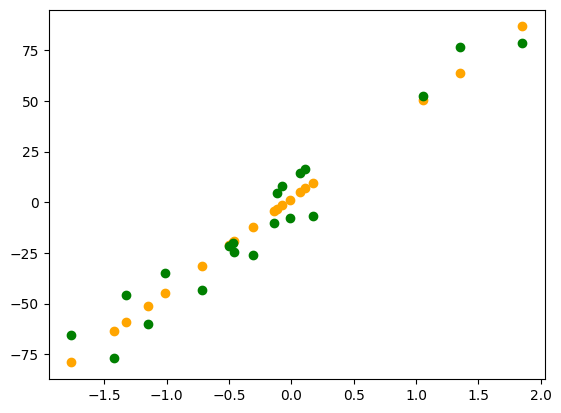

In [ ]:
from matplotlib import pyplot as plt

with torch.inference_mode():
  y_new_preds = model1(X_test)

  #calc the loss after training
  test_loss = loss_fn(y_new_preds,y_test)

print(test_loss )
plt.scatter(X_test, y_new_preds, c="orange")
plt.scatter(X_test, y_test, c="green")